# Installing Required Libraries

In [1]:
!pip install torch torchvision cleanvision scikit-learn matplotlib numpy onnx opencv-python-headless pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

# Importing Libraries

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import os
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from google.colab import drive
import shutil
from cleanvision import Imagelab

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Hyperparameters

In [6]:
image_size = 224
num_classes = 12
num_epochs = 10
batch_size = 64
learning_rate = 0.001

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


# Directories

In [8]:
# Directories
train_dir = "/content/drive/MyDrive/I2V/cleaned_train"
val_dir = "/content/drive/MyDrive/I2V/val"
output_dir = "/content/drive/MyDrive/I2V/EfficientNet"
# metrics_file = os.path.join(output_dir, "training_metrics.txt")
os.makedirs(output_dir, exist_ok=True)

In [9]:
# Data transforms
train_transforms = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
val_transforms = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [10]:
# Load datasets
train_dataset = ImageFolder(root=train_dir, transform=train_transforms)
val_dataset = ImageFolder(root=val_dir, transform=val_transforms)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


# Loading pre-trained efficientnet_b0

In [11]:
import torchvision.models as models
import torch.nn as nn

# Load pre-trained EfficientNet (using B0 variant as an example)
model = models.efficientnet_b0(pretrained=True)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
model = model.to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 109MB/s] 


In [12]:
# Loss and optimizer
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

# Initialize metrics


In [13]:
# Function to compute mAP (simplified for multi-class classification)
def compute_map(true_labels, pred_probs, num_classes):
    # Convert to binary relevance (one-hot encoded true labels)
    true_labels_one_hot = np.zeros((len(true_labels), num_classes))
    for i, label in enumerate(true_labels):
        true_labels_one_hot[i, label] = 1

    # Compute Average Precision per class and mean
    average_precisions = []
    for c in range(num_classes):
        true_c = true_labels_one_hot[:, c]
        scores_c = pred_probs[:, c]
        if true_c.sum() == 0:  # Skip if no positive instances
            continue
        sorted_indices = np.argsort(scores_c)[::-1]
        true_c_sorted = true_c[sorted_indices]
        precision_at_k = np.cumsum(true_c_sorted) / (np.arange(len(true_c_sorted)) + 1)
        ap = np.sum(precision_at_k * true_c_sorted) / max(true_c.sum(), 1)
        average_precisions.append(ap)

    return np.mean(average_precisions) if average_precisions else 0.0

In [14]:
def compute_metrics(true_labels, pred_labels, pred_probs, epoch, save_file):
    accuracy = 100 * (true_labels == pred_labels).mean()
    precision = precision_score(true_labels, pred_labels, average='weighted', zero_division=0)
    recall = recall_score(true_labels, pred_labels, average='weighted', zero_division=0)
    f1 = f1_score(true_labels, pred_labels, average='weighted', zero_division=0)
    m_ap = compute_map(true_labels, pred_probs, num_classes)
    cm = confusion_matrix(true_labels, pred_labels)

    metrics_str = (
        f"Validation Metrics - Epoch {epoch+1}:\n"
        f"Accuracy: {accuracy:.2f}%\n"
        f"Precision: {precision:.4f}\n"
        f"Recall: {recall:.4f}\n"
        f"F1 Score: {f1:.4f}\n"
        f"mAP: {m_ap:.4f}\n"
        f"Confusion Matrix:\n{cm}\n\n"
    )
    print(metrics_str)

    with open(save_file, 'a') as f:
        f.write(metrics_str)

    return accuracy, cm

In [15]:
# Training loop with learning curves
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
best_val_acc = 0.0

In [16]:
# Initialize metrics file
with open(os.path.join(output_dir, "training_metrics.txt"), 'w') as f:
    f.write("Training Metrics Log\n\n")

In [17]:
metrics_file = "/content/drive/MyDrive/I2V/EfficientNet/training_metrics.txt"

# Training and Validation

In [19]:
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        # EfficientNet returns only one output (no aux_outputs)
        outputs = model(images)
        # Compute loss for the single output
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}")

    # Validation phase
    model.eval()
    val_loss = 0.0
    val_true = []
    val_pred = []
    val_probs = []

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)  # Single output
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            probs = torch.softmax(outputs, dim=1).detach().cpu().numpy()
            _, predicted = torch.max(outputs, 1)
            val_true.extend(labels.cpu().numpy())
            val_pred.extend(predicted.cpu().numpy())
            val_probs.extend(probs)

    val_loss = val_loss / len(val_loader)
    val_losses.append(val_loss)
    val_acc, cm = compute_metrics(np.array(val_true), np.array(val_pred), np.array(val_probs), epoch, metrics_file)
    val_accuracies.append(val_acc)
    print(f"Validation Loss: {val_loss:.4f}")

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model, os.path.join(output_dir, "efficientnet_b0_best.pt"))
        print(f"Saved best model with Validation Accuracy: {val_acc:.2f}%")

Epoch [1/10], Train Loss: 1.0443
Validation Metrics - Epoch 1:
Accuracy: 79.74%
Precision: 0.8243
Recall: 0.7974
F1 Score: 0.7967
mAP: 0.9212
Confusion Matrix:
[[116   1   6   0   2   0   1   2   0   0   9   0]
 [  0  61   0   0   1   0   0   7   0   0   0   0]
 [  5   0  61   1   1   0   2   0   0   0   1   0]
 [  4   0   6  20   0   0   0   1   0   0   2   2]
 [  0   0   0   0   6   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   1]
 [  5   0   2   1   1   0  81   0   0   0   8   4]
 [  0   3   0   0   0   0   0  66   0   0   0   0]
 [  1   0   0   0   7   0   0   1   2   0   1   0]
 [  0   0   0   0   0   0   0   0   0   3   0   0]
 [ 10   1  37   2   0   0   6   0   0   0  98   3]
 [  1   0   4   0   0   0   0   0   0   0   2  96]]


Validation Loss: 0.5556
Saved best model with Validation Accuracy: 79.74%


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [2/10], Train Loss: 0.4180
Validation Metrics - Epoch 2:
Accuracy: 87.32%
Precision: 0.8781
Recall: 0.8732
F1 Score: 0.8741
mAP: 0.9485
Confusion Matrix:
[[121   0   0   1   0   0   0   3   0   0  12   0]
 [  1  60   0   0   0   0   0   8   0   0   0   0]
 [  1   0  59   1   1   0   1   0   1   0   6   1]
 [  1   1   1  29   0   0   0   0   0   0   3   0]
 [  0   0   0   0   6   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0   0   0]
 [  2   0   0   3   1   0  92   0   0   1   2   1]
 [  0   1   0   0   0   0   0  67   1   0   0   0]
 [  0   0   0   0   3   0   0   0   9   0   0   0]
 [  0   0   0   0   0   0   0   0   0   3   0   0]
 [  7   0  12   4   0   0   7   1   0   0 125   1]
 [  1   0   1   2   0   0   1   0   0   0   2  96]]


Validation Loss: 0.3875
Saved best model with Validation Accuracy: 87.32%


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [3/10], Train Loss: 0.2468
Validation Metrics - Epoch 3:
Accuracy: 87.58%
Precision: 0.8802
Recall: 0.8758
F1 Score: 0.8752
mAP: 0.9329
Confusion Matrix:
[[125   0   1   0   0   0   2   1   0   0   7   1]
 [  0  64   0   0   1   0   0   1   3   0   0   0]
 [  2   0  53   0   1   1   2   0   0   1   9   2]
 [  3   1   3  22   0   0   2   0   0   0   3   1]
 [  0   0   0   0   6   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0   0   0]
 [  0   0   1   0   0   0  93   0   0   1   4   3]
 [  0   1   0   0   1   0   0  64   3   0   0   0]
 [  1   1   0   0   0   0   0   0  10   0   0   0]
 [  0   0   0   0   0   0   0   0   0   3   0   0]
 [  8   0   8   1   0   0   7   0   0   0 129   4]
 [  0   0   1   0   0   0   2   0   0   0   0 100]]


Validation Loss: 0.3883
Saved best model with Validation Accuracy: 87.58%


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [4/10], Train Loss: 0.1695
Validation Metrics - Epoch 4:
Accuracy: 84.71%
Precision: 0.8620
Recall: 0.8471
F1 Score: 0.8465
mAP: 0.9382
Confusion Matrix:
[[112   0   0   0   3   0   1   2   0   0  17   2]
 [  0  60   0   0   0   0   0   9   0   0   0   0]
 [  1   0  47   0   1   1   3   1   0   0  13   4]
 [  1   0   0  25   0   0   0   1   0   0   7   1]
 [  0   0   0   0   6   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0   0   0]
 [  5   0   0   0   1   0  79   0   0   0  11   6]
 [  0   1   0   0   0   0   0  67   1   0   0   0]
 [  1   1   0   0   1   0   0   2   7   0   0   0]
 [  0   0   0   0   0   0   0   0   0   3   0   0]
 [  3   0   2   2   0   0   4   0   0   0 142   4]
 [  1   0   0   2   0   0   0   0   0   0   1  99]]


Validation Loss: 0.5580


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [5/10], Train Loss: 0.1818
Validation Metrics - Epoch 5:
Accuracy: 86.93%
Precision: 0.8772
Recall: 0.8693
F1 Score: 0.8700
mAP: 0.9023
Confusion Matrix:
[[127   0   2   0   0   0   1   1   0   0   6   0]
 [  0  67   0   0   0   0   0   0   1   0   1   0]
 [  0   0  59   0   1   0   5   0   0   0   5   1]
 [  1   0   2  28   0   1   0   0   0   0   3   0]
 [  2   0   0   0   4   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0   0   0]
 [  4   0   0   0   0   0  95   0   0   0   3   0]
 [  0   6   0   0   0   0   0  62   1   0   0   0]
 [  1   1   0   0   0   0   0   0  10   0   0   0]
 [  0   0   0   0   0   0   0   0   0   3   0   0]
 [  4   1  10   1   0   0  13   0   0   1 126   1]
 [  0   0   6   4   0   0  10   0   0   0   0  83]]


Validation Loss: 0.4189


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [6/10], Train Loss: 0.1263
Validation Metrics - Epoch 6:
Accuracy: 88.63%
Precision: 0.8894
Recall: 0.8863
F1 Score: 0.8868
mAP: 0.9450
Confusion Matrix:
[[123   0   2   0   0   0   0   1   0   0  11   0]
 [  0  66   0   0   0   0   0   3   0   0   0   0]
 [  3   0  58   2   1   1   1   1   0   0   3   1]
 [  0   0   3  30   0   0   0   0   0   0   2   0]
 [  1   0   0   0   5   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0   0   0]
 [  4   0   2   1   0   0  90   0   0   0   2   3]
 [  0   1   0   0   0   0   0  68   0   0   0   0]
 [  1   0   0   1   0   0   0   0  10   0   0   0]
 [  0   0   0   0   0   0   0   0   0   3   0   0]
 [  7   0   7   7   0   0   4   0   0   1 128   3]
 [  3   0   1   1   0   0   1   0   0   0   1  96]]


Validation Loss: 0.4356
Saved best model with Validation Accuracy: 88.63%


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [7/10], Train Loss: 0.0990
Validation Metrics - Epoch 7:
Accuracy: 88.76%
Precision: 0.8902
Recall: 0.8876
F1 Score: 0.8860
mAP: 0.9326
Confusion Matrix:
[[131   0   0   0   0   0   0   0   0   0   6   0]
 [  0  65   0   0   0   0   0   4   0   0   0   0]
 [  1   1  50   0   1   0   2   0   1   0  10   5]
 [  1   1   0  28   0   0   0   0   0   0   5   0]
 [  1   0   0   0   5   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0   0   0]
 [  2   0   0   0   0   0  96   0   1   0   2   1]
 [  1   1   0   0   0   0   0  66   1   0   0   0]
 [  1   0   0   0   0   0   0   0  11   0   0   0]
 [  0   0   0   0   0   0   0   0   0   3   0   0]
 [  8   0   3   3   0   1  10   0   0   0 123   9]
 [  1   0   0   1   0   1   0   0   0   0   0 100]]


Validation Loss: 0.4169
Saved best model with Validation Accuracy: 88.76%


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [8/10], Train Loss: 0.0873
Validation Metrics - Epoch 8:
Accuracy: 88.24%
Precision: 0.8854
Recall: 0.8824
F1 Score: 0.8830
mAP: 0.9315
Confusion Matrix:
[[117   0   1   4   0   0   2   1   0   0  12   0]
 [  0  67   0   0   0   0   0   1   1   0   0   0]
 [  1   0  59   0   1   0   2   0   0   0   7   1]
 [  0   0   1  27   0   0   0   1   0   0   6   0]
 [  1   0   0   0   4   0   0   0   0   0   1   0]
 [  0   0   0   0   0   1   0   0   0   0   0   0]
 [  0   0   1   0   0   0  94   0   0   0   6   1]
 [  1   4   0   0   0   0   0  62   1   0   1   0]
 [  1   1   0   0   0   0   0   0   9   0   1   0]
 [  0   0   0   0   0   0   0   0   0   3   0   0]
 [  3   0   9   3   0   0   3   0   0   0 136   3]
 [  0   0   1   3   0   0   3   0   0   0   0  96]]


Validation Loss: 0.4640


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [9/10], Train Loss: 0.1177
Validation Metrics - Epoch 9:
Accuracy: 86.54%
Precision: 0.8706
Recall: 0.8654
F1 Score: 0.8639
mAP: 0.9149
Confusion Matrix:
[[131   0   1   0   1   0   0   2   0   0   2   0]
 [  2  64   0   0   0   0   0   1   1   1   0   0]
 [  4   1  57   1   1   0   0   0   0   0   6   1]
 [  1   1   1  25   0   0   0   0   0   0   6   1]
 [  0   1   0   0   5   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0   0   0]
 [  0   1   1   3   1   0  90   0   0   0   4   2]
 [  0   3   0   0   0   0   0  64   1   0   1   0]
 [  2   0   0   0   0   0   1   0   9   0   0   0]
 [  0   0   0   0   0   0   0   0   0   3   0   0]
 [ 31   0   6   3   0   0   2   0   0   0 111   4]
 [  0   0   0   1   0   0   0   0   0   0   0 102]]


Validation Loss: 0.5816


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [10/10], Train Loss: 0.1306
Validation Metrics - Epoch 10:
Accuracy: 85.88%
Precision: 0.8658
Recall: 0.8588
F1 Score: 0.8593
mAP: 0.9342
Confusion Matrix:
[[124   1   0   0   1   0   2   3   0   0   6   0]
 [  0  64   0   0   0   0   0   5   0   0   0   0]
 [  4   0  52   0   2   0   6   0   0   0   7   0]
 [  1   0   0  28   0   0   1   2   0   0   3   0]
 [  0   1   0   0   5   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0   0   0]
 [  2   0   2   1   1   0  93   0   0   0   2   1]
 [  0   3   0   0   0   0   0  65   1   0   0   0]
 [  0   1   0   0   1   0   0   0   9   0   1   0]
 [  0   0   0   0   0   0   0   0   0   3   0   0]
 [  3   0  10   5   2   0  19   1   0   0 116   1]
 [  1   0   0   3   0   0   2   0   0   0   0  97]]


Validation Loss: 0.5180


# Accuracy

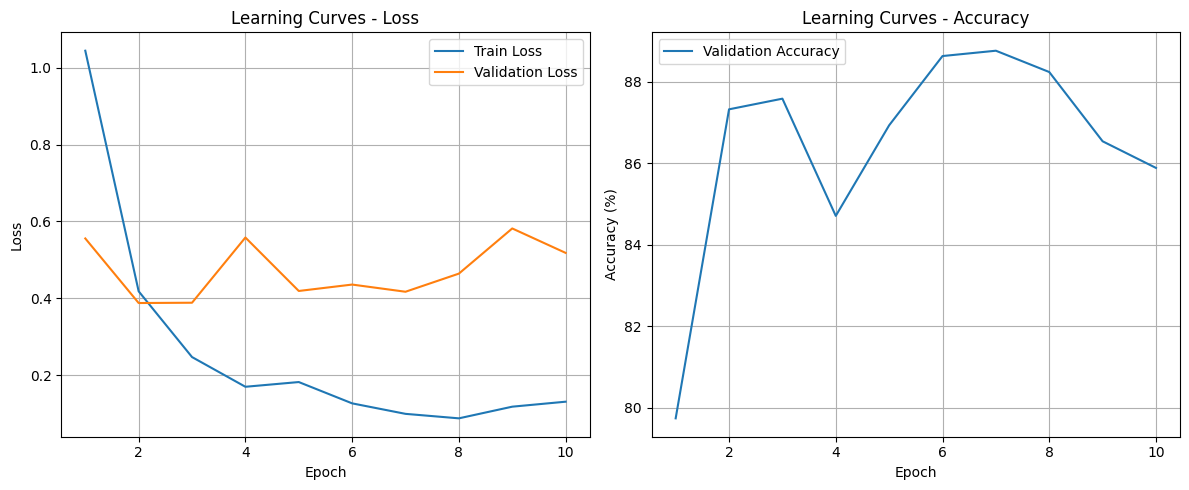

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curves - Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Learning Curves - Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig(os.path.join(output_dir, "learning_curves.png"))
plt.show()

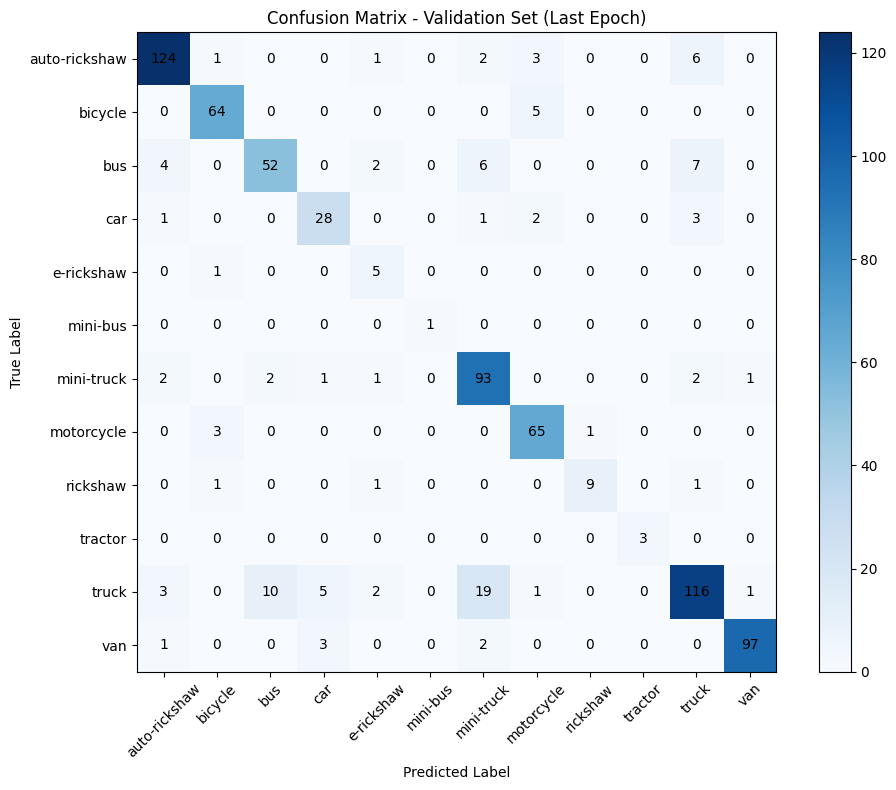

Training complete. Best Validation Accuracy: 88.76%


In [21]:
# Plot confusion matrix (using the last epoch's validation CM)
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Validation Set (Last Epoch)')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, val_dataset.classes, rotation=45)
plt.yticks(tick_marks, val_dataset.classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "confusion_matrix.png"))
plt.show()

print(f"Training complete. Best Validation Accuracy: {best_val_acc:.2f}%")

# Saving Model

In [23]:
# Use an image size compatible with Inception V3 (299x299)
dummy_input = torch.randn(1, 3, image_size, image_size).to(device)
torch.onnx.export(
    model,
    dummy_input,
    os.path.join(output_dir, "efficientnet_b0_best.onnx"),
    verbose=True,
    input_names=["input"],
    output_names=["output"],
    dynamic_axes={"input": {0: "batch_size"}, "output": {0: "batch_size"}},
    opset_version=11,
)
print("Model exported to ONNX")

Model exported to ONNX
